In [333]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

In [334]:
f = h5py.File("./logging/logs3.txt", 'r', libver='latest', swmr=True)

In [335]:
move_q =  f['statistics']["ep_reward"][:]

In [336]:
num_eps = 5250
buckets = 50

In [337]:
print sum( (move_q[: num_eps] > 0).astype(int) )

0


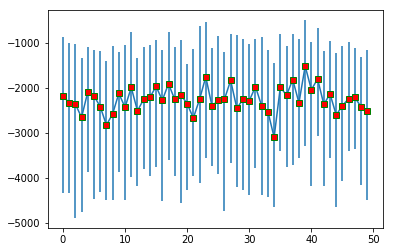

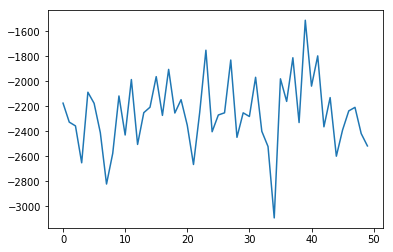

In [338]:
yerr1 = [np.percentile(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(range(buckets), [np.median(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green')
plt.figure()
plt.plot(range(buckets), [np.median(move_q[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
plt.figure()

In [339]:
goodq =  f['statistics']["ep_goodq"][:]

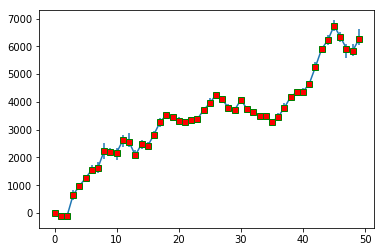

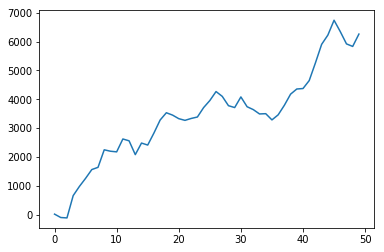

In [340]:
yerr1 = [np.percentile(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(range(buckets), [np.median(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green')
plt.figure()
plt.plot(range(buckets), [np.median(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
plt.figure()

In [341]:
badq =  f['statistics']["ep_badq"][:]

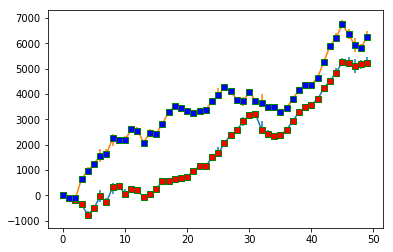

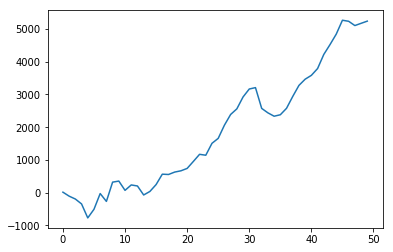

In [342]:
yerr1 = [np.percentile(badq[num_eps*i/buckets:num_eps*(i+1)/buckets], 75) for i in range(buckets)]
yerr2 = [np.percentile(badq[num_eps*i/buckets:num_eps*(i+1)/buckets], 25) for i in range(buckets)]
yerr = np.zeros((2, len(yerr1)))
yerr[1] = np.array(yerr1) - np.array([np.median(badq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
yerr[0] = np.array([np.median(badq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)]) - np.array(yerr2)

plt.errorbar(range(buckets), [np.median(badq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='red',
         mec='green')
plt.errorbar(range(buckets), [np.median(goodq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)], yerr,
            marker='s', mfc='blue',
         mec='green')


plt.figure()
plt.plot(range(buckets), [np.median(badq[num_eps*i/buckets:num_eps*(i+1)/buckets]) for i in range(buckets)])
plt.figure()